In [109]:
%load_ext autoreload
%autoreload 2

import numpy as np
from sklearn import manifold, datasets
from sklearn.metrics import pairwise_kernels as kernel
from sklearn.metrics.pairwise import rbf_kernel
from numpy.linalg import inv

from SSOKMF import SSOKMF
from L1Normalization import L1Normalization
from CNMF import CNMF

from sklearn.utils.graph import graph_shortest_path
from sklearn.neighbors import NearestNeighbors, kneighbors_graph
from sklearn.preprocessing import KernelCenterer

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
Axes3D

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


mpl_toolkits.mplot3d.axes3d.Axes3D

In [110]:
def add_subplot(fig, method_name, Y, time, err, ncols, pos):
    print("{}: {:.2} sec, err:{}".format(
            method_name, time, err))

    ax = fig.add_subplot(1, ncols, pos)
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    plt.title("{}".format(method_name))
    plt.axis('tight')

# Isomap kernel

In [111]:
def geodesic_distance(X, n_neighbors):
    neighbors_algorithm = 'auto'
    nbrs = NearestNeighbors(n_neighbors=n_neighbors, 
                            algorithm=neighbors_algorithm)
    nbrs.fit(X)
    kng = kneighbors_graph(nbrs, 
                           n_neighbors,
                           mode='distance')
    path_method = 'auto'
    return graph_shortest_path(kng, 
                               method=path_method, 
                               directed=False)

def isomapKernel(X, n_neighbors):
    
    # K(D) = -0.5 * (I - 1/n_samples) * D^2 * (I - 1/n_samples)
    dist_matrix = geodesic_distance(X, n_neighbors) 
    G = -0.5 * dist_matrix ** 2
    return KernelCenterer().fit_transform(G)

# s_curve

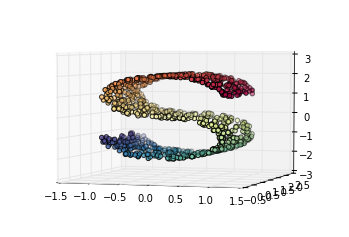

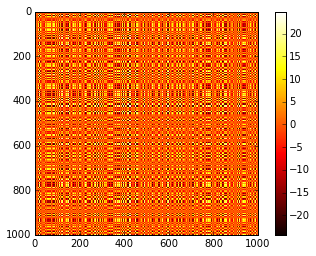

max 24.8680600177
min -24.302470643
mean 1.70683023271e-15
___________________________________________________________________________
lambda:0.01
beta:0.0
SSOKMF V0.15
SS-OKMF: 0.0 sec, err:-113.587619538
PHI: 0.0 sec, err:0
W: 0.0 sec, err:0
[ -113.58761954 -2132.14767371     0.        ]


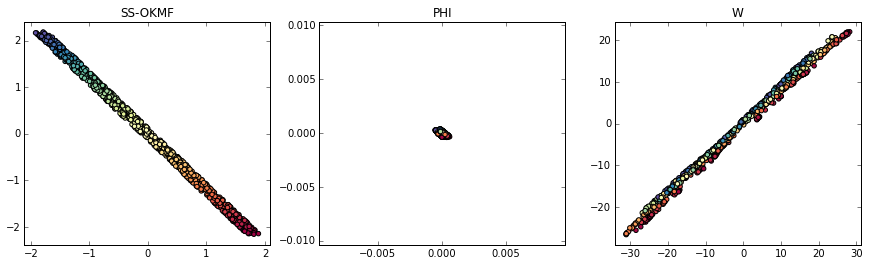

SSOKMF V0.15
SS-OKMF: 0.0 sec, err:-2036.29841508
PHI: 0.0 sec, err:0
W: 0.0 sec, err:0
[-2036.29841508 -2039.20326141     0.        ]


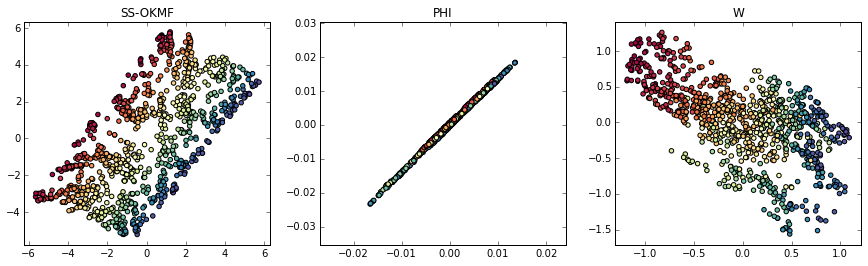

SSOKMF V0.15
SS-OKMF: 0.0 sec, err:-2157.76754126
PHI: 0.0 sec, err:0
W: 0.0 sec, err:0
[-2157.76754126 -2165.86189023     0.        ]


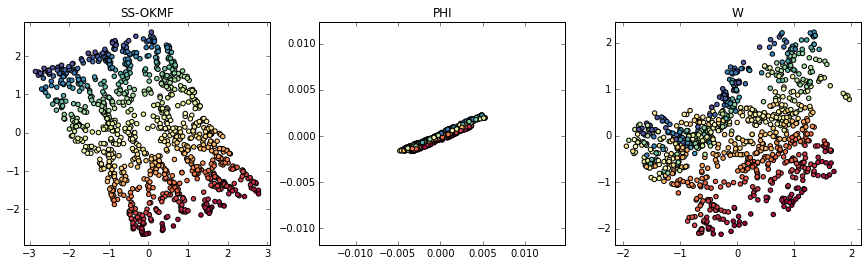

SSOKMF V0.15
SS-OKMF: 0.0 sec, err:-2060.64137083
PHI: 0.0 sec, err:0
W: 0.0 sec, err:0
[-2060.64137083 -2065.03310415     0.        ]


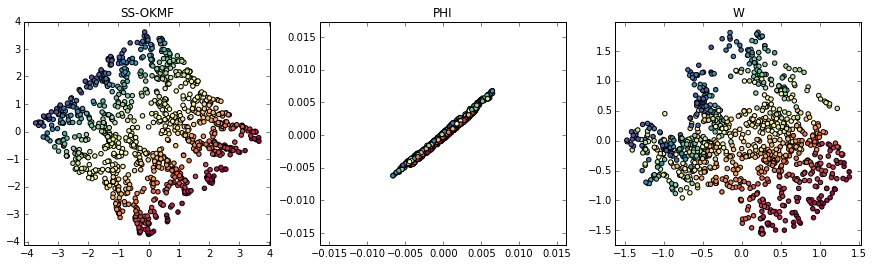

SSOKMF V0.15
SS-OKMF: 0.0 sec, err:-1735.02098642
PHI: 0.0 sec, err:0
W: 0.0 sec, err:0
[-1735.02098642 -2131.25927798     0.        ]


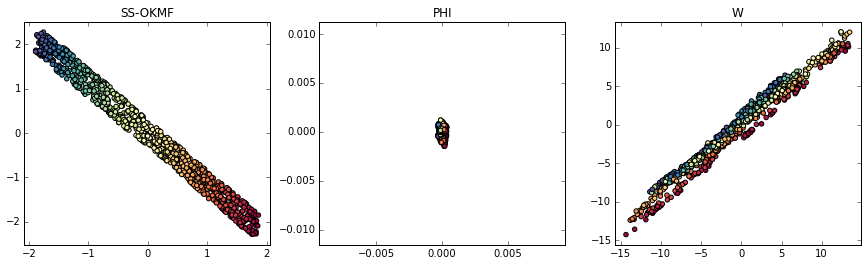

SSOKMF V0.15
SS-OKMF: 0.0 sec, err:-2006.00123064
PHI: 0.0 sec, err:0
W: 0.0 sec, err:0
[-2006.00123064 -2057.31901398     0.        ]


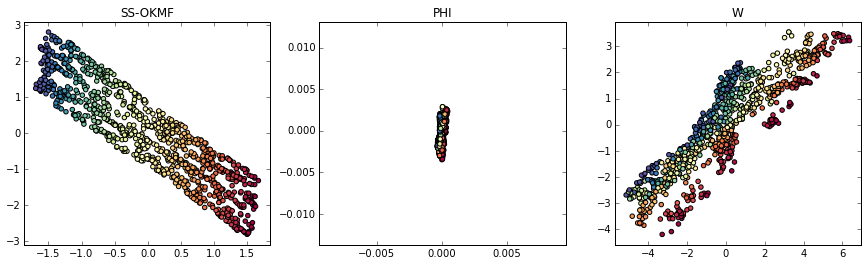

SSOKMF V0.15
SS-OKMF: 0.0 sec, err:-2149.03271975
PHI: 0.0 sec, err:0
W: 0.0 sec, err:0
[-2149.03271975 -2152.86073323     0.        ]


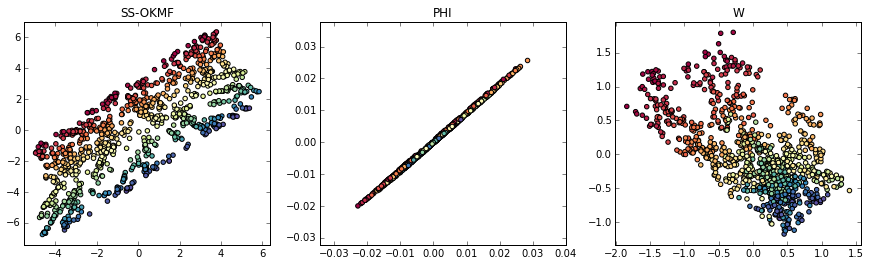

SSOKMF V0.15
SS-OKMF: 0.0 sec, err:-2087.63987318
PHI: 0.0 sec, err:0
W: 0.0 sec, err:0
[-2087.63987318 -2100.2046871      0.        ]


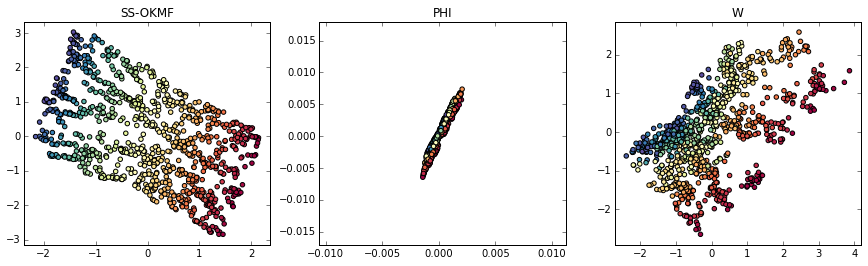

SSOKMF V0.15
SS-OKMF: 0.0 sec, err:-2117.03620003
PHI: 0.0 sec, err:0
W: 0.0 sec, err:0
[-2117.03620003 -2119.93937713     0.        ]


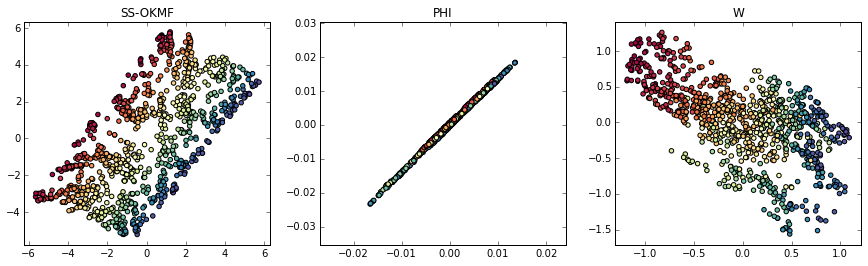

SSOKMF V0.15
SS-OKMF: 0.0 sec, err:-2027.34857485
PHI: 0.0 sec, err:0
W: 0.0 sec, err:0
[-2027.34857485 -2030.81150161     0.        ]


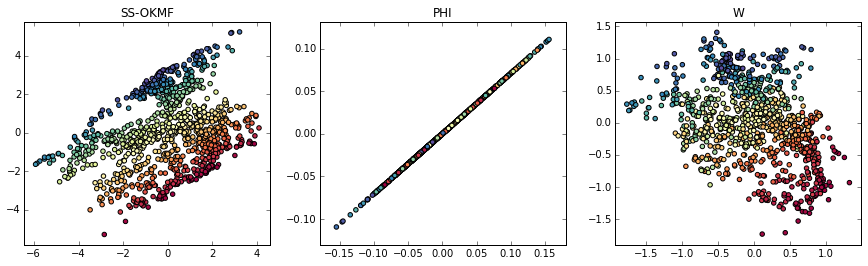

In [117]:
n_points = 1000
X, color = datasets.samples_generator.make_s_curve(n_points, random_state=0)
#X, color = datasets.samples_generator.make_swiss_roll(n_points, random_state=0)
T = color.reshape((-1,1))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)
plt.show()

K = isomapKernel(X, 10)

plt.imshow(K, interpolation='nearest', cmap=plt.cm.hot)
plt.colorbar()
plt.show()

print 'max', np.amax(K)
print 'min', np.amin(K)
print 'mean', np.mean(K)

for l in [0.01]:

    for b in [0.0]:

        budget = X.shape[0]
        topics = 2
        minibatch = X.shape[0]
        epochs = 50
        alpha = 0.5
        beta = b
        gamma = 0.1
        lambda0 = 0.01
        lambda1 = l
        lambda2 = l
        lambda3 = l
        kernel_metric = 'precomputed'
        initialization = 'clustering'

        print '___________________________________________________________________________'
        print 'lambda:{}'.format(l)
        print 'beta:{}'.format(beta)

        for i in range(10):

            mf = SSOKMF(budget, topics, minibatch, epochs, gamma, alpha, beta, lambda0, 
                        lambda1, lambda2, lambda3, kernel_metric)

            mf.fit(K, T, calculateErrors=True, initialization=initialization, errorSubsetPercentage=1)

            phi = np.dot(inv(np.dot(np.dot(mf.Wv.T, K), mf.Wv)), mf.Wv.T)

            fig = plt.figure(figsize=(15, 4))
            add_subplot(fig, 'SS-OKMF', mf.predictH(X).T*1000, 0.0, mf.trainErrors[-1, 0], 3, 1)
            add_subplot(fig, 'PHI', phi.T*1000, 0.0, 0, 3, 2)
            add_subplot(fig, 'W', mf.Wv, 0.0, 0, 3, 3)
            print  mf.trainErrors[-1,:]
            plt.show()

# swiss_roll

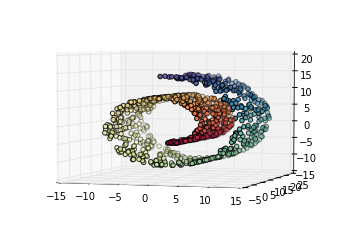

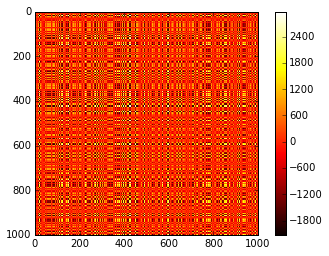

max 2970.64960386
min -2125.12422305
mean -8.1581674749e-14
___________________________________________________________________________
lambda:0.01
beta:0.0
SSOKMF V0.15


IndexError: too many indices for array

In [88]:
n_points = 1000
#X, color = datasets.samples_generator.make_s_curve(n_points, random_state=0)
X, color = datasets.samples_generator.make_swiss_roll(n_points, random_state=0)
T = color.reshape((-1,1))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)
plt.show()

K = isomapKernel(X, 10)

plt.imshow(K, interpolation='nearest', cmap=plt.cm.hot)
plt.colorbar()
plt.show()

print 'max', np.amax(K)
print 'min', np.amin(K)
print 'mean', np.mean(K)

for l in [0.01]:

    for b in [0.0]:

        budget = X.shape[0]
        topics = 2
        minibatch = X.shape[0]
        epochs = 50
        alpha = 0.5
        beta = b
        gamma = 0.1
        lambda0 = 0.01
        lambda1 = l
        lambda2 = l
        lambda3 = l
        kernel_metric = 'precomputed'

        print '___________________________________________________________________________'
        print 'lambda:{}'.format(l)
        print 'beta:{}'.format(beta)

        for i in range(10):

            mf = SSOKMF(budget, topics, minibatch, epochs, gamma, alpha, beta, lambda0, 
                        lambda1, lambda2, lambda3, kernel_metric)

            mf.fit(K, T, None, True, None)

            phi = np.dot(inv(np.dot(np.dot(mf.Wv.T, K), mf.Wv)), mf.Wv.T)

            fig = plt.figure(figsize=(15, 4))
            add_subplot(fig, 'SS-OKMF', mf.predictH(X).T*1000, 0.0, mf.trainErrors[-1, 0], 3, 1)
            add_subplot(fig, 'PHI', phi.T*1000, 0.0, 0, 3, 2)
            add_subplot(fig, 'W', mf.Wv, 0.0, 0, 3, 3)
            print  mf.trainErrors[-1,:]
            plt.show()

